# Exercise Model

## Requirement

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

## Data Preparation

In [4]:
df_cal = pd.read_csv('/content/calories.csv')
df_ex = pd.read_csv('/content/exercise.csv')

In [5]:
df_cal

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [6]:
df_ex

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


In [7]:
# merge
df = pd.merge(df_ex, df_cal, on = 'User_ID')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [9]:
df['Gender'] = pd.get_dummies(df['Gender'], prefix_sep='_', drop_first=True)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
Name: Calories, dtype: float64


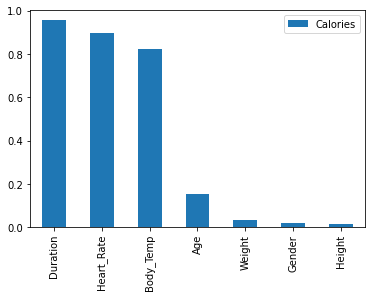

In [10]:
# correlations with calories
correlations = df.drop(columns=['User_ID'],axis=1).copy().corr()['Calories']
correlations = correlations.sort_values(ascending=False).drop('Calories',axis=0)
print(correlations)
correlations.to_frame().plot.bar();

In [11]:
df_7f = df[['Duration','Heart_Rate','Body_Temp','Age','Weight','Gender','Height','Calories']].copy()
df_7f.rename(columns={'Duration':'t',
                      'Heart_Rate':'h',
                      'Body_Temp':'T',
                      'Age':'A',
                      'Weight':'W',
                      'Gender':'G',
                      'Height':'H',
                      'Calories':'C'},inplace=True)

In [12]:
# train test split
X = df_7f[['t','h','T','A','W','G','H']]
y = df_7f['C']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

In [14]:
model = keras.Sequential([
    keras.layers.Dense(X.shape[1], activation='relu', input_dim = X.shape[1]), # input
    keras.layers.Dense(512, kernel_initializer='normal', activation='relu'), # beginning of hidden layer
    keras.layers.Dense(512, kernel_initializer='normal', activation='relu'),
    keras.layers.Dense(256, kernel_initializer='normal', activation='relu'),
    keras.layers.Dense(128, kernel_initializer='normal', activation='relu'),
    keras.layers.Dense(64, kernel_initializer='normal', activation='relu'),
    keras.layers.Dense(32, kernel_initializer='normal', activation='relu'), # end of hidden layer
    keras.layers.Dense(1, kernel_initializer='normal', activation='relu') # output
])

In [15]:
model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mse','mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 512)               4096      
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [16]:
history = model.fit(X_train, y_train.to_numpy(), batch_size = 10, epochs = 25, verbose = 1)

Epoch 1/25
1200/1200 [==============================] - 11s 8ms/step - loss: 588.6910 - mse: 588.6910 - mae: 13.7051
Epoch 2/25
1200/1200 [==============================] - 8s 7ms/step - loss: 48.1330 - mse: 48.1330 - mae: 5.0044
Epoch 3/25
1200/1200 [==============================] - 9s 7ms/step - loss: 25.4750 - mse: 25.4750 - mae: 3.6683
Epoch 4/25
1200/1200 [==============================] - 8s 7ms/step - loss: 18.1622 - mse: 18.1622 - mae: 3.1302
Epoch 5/25
1200/1200 [==============================] - 8s 7ms/step - loss: 13.7528 - mse: 13.7528 - mae: 2.7003
Epoch 6/25
1200/1200 [==============================] - 9s 7ms/step - loss: 11.9758 - mse: 11.9758 - mae: 2.5143
Epoch 7/25
1200/1200 [==============================] - 8s 6ms/step - loss: 9.8592 - mse: 9.8592 - mae: 2.2597
Epoch 8/25
1200/1200 [==============================] - 10s 8ms/step - loss: 9.5924 - mse: 9.5924 - mae: 2.1029
Epoch 9/25
1200/1200 [==============================] - 8s 7ms/step - loss: 6.8810 - mse: 6.881

In [17]:
y_pred = model.predict(X_test)

In [20]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 4ms/step - loss: 0.3263 - mse: 0.3263 - mae: 0.4361


[0.32633453607559204, 0.32633453607559204, 0.4361295998096466]

In [21]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae'])

In [22]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['mae'], label='mae')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Calories]')
  plt.legend()
  plt.grid(True)

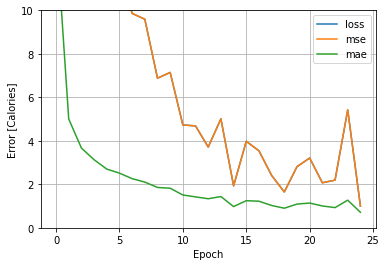

In [23]:
plot_loss(history)

In [26]:
model.save('model1.h5')

In [28]:
test = tf.keras.models.load_model('model1.h5')
test.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 512)               4096      
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2